In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

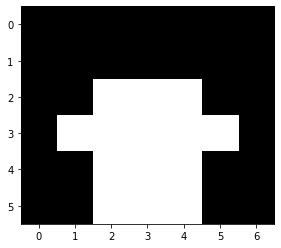

In [3]:
donut = np.array([[0,0,0,0,0,0,0],[0,0,1,1,1,0,0],[0,1,1,0,1,1,0],[0,1,1,0,1,1,0],[0,0,1,1,1,0,0],[0,0,0,0,0,0,0]])
house = np.array([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,1,1,1,0,0],[0,1,1,1,1,1,0],[0,0,1,1,1,0,0],[0,0,1,1,1,0,0]])
square = np.array([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,1,1,1,0,0],[0,0,1,1,1,0,0],[0,0,1,1,1,0,0]])
plt.imshow(house,cmap='gray')

In [4]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import random

block_color_set = ['black']
pokemon = ["#ff0000","#f6bd20","#9c5200","#de9400","#623108","#62d5b4","#83eec5","#184a4a","#73ac31","#e65a41","#29739c"]
random.shuffle(pokemon)
block_color_set += pokemon
maskmap = ListedColormap(block_color_set,N=11)
#norm = BoundaryNorm(list(range(12)), 11)


In [5]:
def weirdHouse():
    new_sq = square.copy()
    i = 0
    while random.random() < 0.75 and i < 10:
        c = random.randint(0,6)
        r = random.randint(1,4)
        new_sq[r,c] = 1
        i+=1
    return new_sq

def colorHouse():
    cs = list(range(1,11))
    random.shuffle(cs)
    canvas = np.zeros((6,7))
    #rows
    for x in range(7):
        canvas[4:,x] = random.choice(cs[2:-1])
    #any above
    for x in range(7):
        for y in [0,1]:
            canvas[y,x] = random.choice(cs[1:])
    canvas[np.where(square==1)] = cs[0] #color base
    canvas[5,1] = cs[0]
    canvas[5,5] = cs[0]
    canvas[3,:] = cs[-1]  #top
    for x in range(7):
        canvas[2,x] = random.choice(cs[-3:])
        
    return canvas
    
def showMask(mask,img,debug=False):
#     v = np.unique(img)
    v = list(range(11))
    norm = BoundaryNorm(v, len(v)-1)
    
    c = ['gray',maskmap,maskmap]
    m = [mask,img, mask*img]
    n = [None,norm,norm]
    
    plt.figure(figsize=(5,2))
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.xticks([])
        plt.yticks([])
        #plt.imshow(np.array(m[i]).squeeze(),cmap=c[i],norm=n[i])
        plt.imshow(np.array(m[i]).squeeze(),cmap=c[i],vmin=0,vmax=(10 if i > 0 else 1))
    plt.show()
    
    if debug:
        print(img)
        print(mask*img)
     
    
#assum 6x7 shape
def encode(l):
    b = np.zeros((6,7,11))
    for i in range(42):
        c = i%6
        r = i//7
        v = int(l[r,c])
        b[r,c,v]=1
    return b

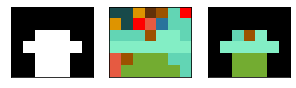

In [6]:
#level = np.random.randint(12, size=(6, 7))
level = colorHouse()
showMask(house,level)

In [7]:
#make lots of weird houses as training data
NUM_HOUSES = 2500
X_dat = []
y_dat = []
y_dat2 = []
for i in range(NUM_HOUSES):
    mask_house = weirdHouse()
    bin_house = np.expand_dims(mask_house,axis=-1)
    full_color = colorHouse()
    #full_color = np.random.randint(12, size=(6, 7))
    cat_house = full_color*bin_house.squeeze()
    cat_house2 = encode(cat_house)
    
    X_dat.append(bin_house)
    y_dat.append(full_color)
    y_dat2.append(cat_house2)
    
X_dat = np.array(X_dat)
y_dat = np.array(y_dat)
y_dat2 = np.array(y_dat2)

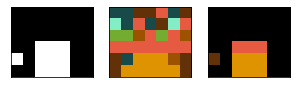

[[ 5.  5.  7.  7.  8.  5.  7.]
 [ 6.  5.  8.  5.  7.  6.  8.]
 [10. 10.  9.  8. 10.  8.  9.]
 [ 8.  8.  8.  8.  8.  8.  8.]
 [ 7.  5.  1.  1.  1.  9.  7.]
 [ 7.  1.  1.  1.  1.  1.  7.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 8. 8. 8. 0. 0.]
 [7. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]]


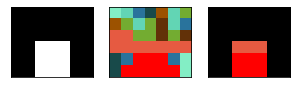

[[ 6.  3.  4.  5.  9.  3. 10.]
 [ 9. 10.  3. 10.  7.  3.  4.]
 [ 8.  8. 10. 10.  7. 10.  7.]
 [ 8.  8.  8.  8.  8.  8.  8.]
 [ 5.  4.  2.  2.  2.  4.  6.]
 [ 5.  2.  2.  2.  2.  2.  6.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 8. 8. 8. 0. 0.]
 [0. 0. 2. 2. 2. 0. 0.]
 [0. 0. 2. 2. 2. 0. 0.]]


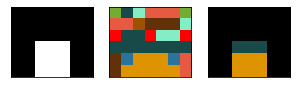

[[10.  5.  6.  8.  8.  8. 10.]
 [ 8.  8.  9.  7.  7.  7.  6.]
 [ 2.  5.  5.  2.  6.  6.  2.]
 [ 5.  5.  5.  5.  5.  5.  5.]
 [ 7.  4.  1.  1.  1.  4.  8.]
 [ 7.  1.  1.  1.  1.  1.  8.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 5. 5. 5. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]]


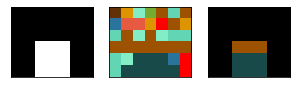

[[ 7.  1.  6. 10.  9.  3.  9.]
 [ 4.  8.  8.  1.  2.  9.  1.]
 [ 3.  9.  6.  9.  6.  3.  3.]
 [ 9.  9.  9.  9.  9.  9.  9.]
 [ 3.  6.  5.  5.  5.  4.  2.]
 [ 3.  5.  5.  5.  5.  5.  2.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 9. 9. 9. 0. 0.]
 [0. 0. 5. 5. 5. 0. 0.]
 [0. 0. 5. 5. 5. 0. 0.]]


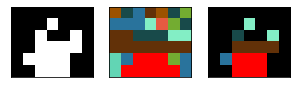

[[ 9.  5.  4.  7.  9.  5. 10.]
 [ 4.  4.  4.  6.  8. 10.  5.]
 [ 7.  7.  5.  5.  5.  6.  6.]
 [ 7.  7.  7.  7.  7.  7.  7.]
 [ 3.  4.  2.  2.  2. 10.  4.]
 [ 3.  2.  2.  2.  2.  2.  4.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 6. 0. 0. 0.]
 [0. 0. 5. 0. 0. 6. 0.]
 [0. 0. 7. 7. 7. 7. 0.]
 [0. 4. 2. 2. 2. 0. 0.]
 [0. 0. 2. 2. 2. 0. 0.]]


In [8]:
#show a few
for i in range(5):
    rh = random.choice(range(NUM_HOUSES))
    showMask(X_dat[rh].squeeze(),y_dat[rh])
    print(y_dat[rh])
    print(X_dat[rh].squeeze()*y_dat[rh])

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D
from keras import backend as K


#train the masking model
maskModel = Sequential()
maskModel.add(Input(shape=(6,7,1)))
maskModel.add(Conv2D(32,2,activation="relu", padding="same"))
maskModel.add(Conv2D(16,2,activation="relu", padding="same"))
maskModel.add(Conv2D(11,2,activation="sigmoid", padding="same"))
#maskModel.add(Dense(11,activation="sigmoid"))
maskModel.add(Dense(11,activation="softmax"))

def mask_loss(y_true,y_pred):
    #cast values
    zero = tf.constant(0, dtype=tf.float32)
    y_true2 = tf.cast(y_true,tf.float32)
    y_pred2 = tf.cast(y_pred,tf.float32)
    
    #apply mask
    mask = tf.cast(tf.where(tf.not_equal(y_true2, zero),1,0),tf.float32)
#     mask_pred = tf.math.multiply(yp2,mask)
    mask_pred = tf.math.multiply(y_pred2,mask)
    
    #get non-zero values only
#     mb = tf.cast(mask, dtype=tf.bool)
#     yt3 = tf.boolean_mask(y_true2,mb)
#     mp3 = tf.boolean_mask(mask_pred,mb)
    
    #return -(97.0 * y_true2 * K.log(mask_pred) + 3.0 * (1.0 - y_true2) * K.log(1.0 - mask_pred)) / 100.0 #wbce
    #return tf.math.reduce_mean(tf.math.abs(y_true2 - tf.math.multiply(y_pred2,mask)) )   #mse
    return tf.losses.mean_squared_error(y_true2,mask_pred)
#     return tf.losses.mean_squared_error(yt3,mp3)
maskModel.compile(optimizer='adam',loss=mask_loss)
maskModel.summary()

2022-09-27 16:12:03.470311: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 7, 32)          160       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 7, 16)          2064      
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 7, 11)          715       
                                                                 
 dense (Dense)               (None, 6, 7, 11)          132       
                                                                 
Total params: 3,071
Trainable params: 3,071
Non-trainable params: 0
_________________________________________________________________


In [10]:
maskModel.fit(X_dat,y_dat2,epochs=100,batch_size=16,verbose=True)

Epoch 1/100
157/157 [==============================] - 1s 4ms/step - loss: 0.0391
Epoch 2/100
157/157 [==============================] - 1s 4ms/step - loss: 0.0236
Epoch 3/100
157/157 [==============================] - 1s 4ms/step - loss: 0.0232
Epoch 4/100
157/157 [==============================] - 1s 4ms/step - loss: 0.0231
Epoch 5/100
157/157 [==============================] - 1s 4ms/step - loss: 0.0231
Epoch 6/100
157/157 [==============================] - 1s 4ms/step - loss: 0.0228
Epoch 7/100
157/157 [==============================] - 1s 5ms/step - loss: 0.0196
Epoch 8/100
157/157 [==============================] - 1s 4ms/step - loss: 0.0191
Epoch 9/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0191
Epoch 10/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0190
Epoch 11/100
157/157 [==============================] - 1s 5ms/step - loss: 0.0190
Epoch 12/100
157/157 [==============================] - 1s 5ms/step - loss: 0.0189
Epoch 13/100


157/157 [==============================] - 1s 3ms/step - loss: 0.0187
Epoch 100/100
157/157 [==============================] - 1s 4ms/step - loss: 0.0187


In [11]:
def showModelPred(model,bin_house,cat_house,debug=False):
    #get prediction, un-onehot, and apply mask
    pred_dat = np.argmax(model.predict(np.expand_dims(bin_house,axis=0),verbose=False).squeeze(),axis=-1)*bin_house.squeeze()
    comp_house = np.argmax(cat_house,axis=-1)
    
    #normalize colors
    #v = np.unique(np.hstack([comp_house,pred_dat]))
    v = list(range(11))
    norm = BoundaryNorm(v, len(v)-1)
    
    #setup
    labels = ["x","y","pred"]
    c = ['gray',maskmap,maskmap]
    m = [bin_house,comp_house,pred_dat]
    n = [None,norm,norm]
    
    
    #show
    plt.figure(figsize=(5,2))
    plt.axis('off')
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.axis('off')
        plt.imshow(np.array(m[i]).squeeze(),cmap=c[i],norm=n[i])
        plt.title(labels[i])
    plt.show()
    
    if debug:
        print(comp_house)
        print(pred_dat)

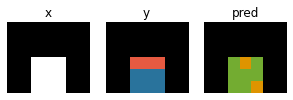

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 8 8 8 0 0]
 [0 0 4 4 4 0 0]
 [0 0 4 4 4 0 0]]
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0 10  1 10  0  0]
 [ 0  0 10 10 10  0  0]
 [ 0  0 10 10  1  0  0]]


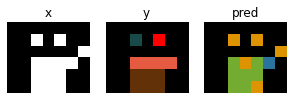

[[0 0 0 0 0 0 0]
 [0 0 5 0 2 0 0]
 [0 0 0 0 0 0 0]
 [0 0 8 8 8 8 0]
 [0 0 7 7 7 0 0]
 [0 0 7 7 7 0 0]]
[[ 0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  0 10  1 10  4  0]
 [ 0  0 10 10 10  0  0]
 [ 0  0 10 10  1  0  0]]


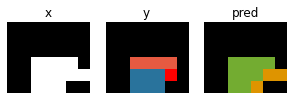

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 8 8 8 8 0]
 [0 0 4 4 4 2 0]
 [0 0 4 4 4 0 0]]
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0 10 10 10 10  0]
 [ 0  0 10 10 10  1  1]
 [ 0  0 10 10  1  0  0]]


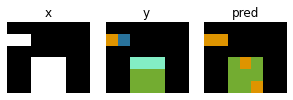

[[ 0  0  0  0  0  0  0]
 [ 1  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  6  6  6  0  0]
 [ 0  0 10 10 10  0  0]
 [ 0  0 10 10 10  0  0]]
[[ 0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0 10  1 10  0  0]
 [ 0  0 10 10 10  0  0]
 [ 0  0 10 10  1  0  0]]


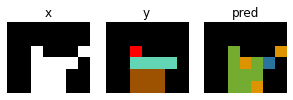

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 3 3 3 3 0]
 [0 0 9 9 9 0 0]
 [0 0 9 9 9 0 0]]
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  1]
 [ 0  0 10  1 10  4  0]
 [ 0  0 10 10 10  0  0]
 [ 0  0 10 10  1  0  0]]


In [12]:
#show some predictions
pickset = random.choices(range(len(X_dat)),k=5)
d = [(X_dat[i],y_dat2[i]) for i in pickset]
for di in d:
    showModelPred(maskModel,di[0],di[1],True)

In [13]:
#show distribution of values in the training dataset
uq,cts = np.unique(y_dat,return_counts=True)
tot = sum(cts)
for u,c in zip(uq,cts):
    print(f"{int(u)}: {c/tot:.4f}")
# cts2 = [0]
# for x in cts:
#     cts2.append(x)
# fig = plt.figure(figsize = (10, 5))
# plt.bar(list(range(11)),cts2)
# plt.show()


1: 0.1008
2: 0.1036
3: 0.1017
4: 0.0991
5: 0.0981
6: 0.0967
7: 0.0995
8: 0.1002
9: 0.1004
10: 0.0999


In [14]:
#simulate the loss
yi = y_dat2[2]
mi = maskModel.predict(np.expand_dims(X_dat[0],axis=0)).squeeze()


zero = tf.constant(0, dtype=tf.float32)
y_true2 = tf.cast(yi,tf.float32)
y_pred2 = tf.cast(mi,tf.float32)
mask = tf.cast(tf.where(tf.not_equal(y_true2, zero),1,0),tf.float32)
mask_pred = tf.math.multiply(y_pred2,mask)

print(mask)

ytr = tf.reshape(y_true2,(42,11))
mpr = tf.reshape(mask_pred,(42,11))

#print(ytr)
#print(mpr)

#print(ytr.shape,mpr.shape)
#print(K.log(mask_pred))  #can't work because log of 0 is inf
cce = tf.keras.losses.CategoricalCrossentropy()
cce(ytr,mpr).numpy()

#-(97.0 * y_true2 * K.log(mask_pred) + 3.0 * (1.0 - y_true2) * K.log(1.0 - mask_pred)) / 100.0 #wbce

1/1 [==============================] - 0s 27ms/step
tf.Tensor(
[[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 

nan

In [15]:
#print(tf.reshape(tf.transpose(y_true2,perm=[0,2,1]),(42,11)))
for i in range(11):
    print(y_dat2[0][:,:,i])
    
print(np.reshape(y_dat2[0],(42,11)))
#print(np.argmax(yi,axis=-1))
#plt.imshow(np.argmax(yi,axis=-1),cmap=maskmap)

[[1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 0. 0. 1. 1. 0.]
 [1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [16]:
cce = tf.keras.losses.CategoricalCrossentropy()

a = [[[0, 1,0], [0,0,0]], [[1, 0,1], [1,0,0]]]
b = [[[0.05, 0.95,0], [0.7,0,1]], [[0.9, 0.8,0.1], [0.1,0.5,0.4]]]
a2 = tf.reshape(a,(4,3))
b2 = tf.reshape(b,(4,3))  #(batches, classes)

print(np.array(a).shape)
print(a2.shape)
print(a2.numpy())
print(b2.numpy())
cce(a2,b2).numpy()

(2, 2, 3)
(4, 3)
[[0 1 0]
 [0 0 0]
 [1 0 1]
 [1 0 0]]
[[0.05 0.95 0.  ]
 [0.7  0.   1.  ]
 [0.9  0.8  0.1 ]
 [0.1  0.5  0.4 ]]


1.4843494

tf.Tensor(
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0]
 [0 0 8 8 8 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]], shape=(6, 7), dtype=int64)


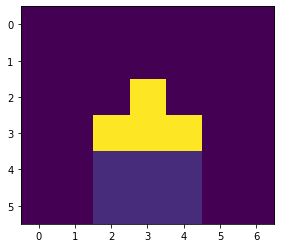

In [17]:
#un-hot encode
print(tf.math.argmax(yi,axis=-1))
plt.imshow(np.argmax(yi,axis=-1))

### Test loss function

In [18]:
#train the masking model
mm = Sequential()
mm.add(Input(shape=(6,7,1)))
mm.add(Conv2D(32,2,activation="relu", padding="same"))
mm.add(Conv2D(16,2,activation="relu", padding="same"))
mm.add(Conv2D(11,2,activation="relu", padding="same"))
#mm.add(Dense(11,activation="sigmoid"))
mm.add(Dense(11,activation="softmax"))

In [19]:
def mask_lossT(y_true,y_pred):
    #cast values
    zero = tf.constant(0, dtype=tf.float32)
    y_true2 = tf.cast(y_true,tf.float32)
    y_pred2 = tf.cast(y_pred,tf.float32)
    
    #use argmax
#     yp2 = tf.one_hot(tf.cast(tf.math.argmax(y_pred2, axis=2),dtype=tf.int32),11, dtype=tf.float32)
#     yp2 = tf.cast(tf.math.argmax(y_pred2, axis=-1),dtype=tf.float32)
#     print(yp2.shape)
#     print(type(yp2))
#     print(yp2)

    
    #apply mask
    #mask = tf.cast(tf.where(tf.not_equal(y_true2, zero),1,0),tf.float32)
#     mask_pred = tf.math.multiply(y_pred2,mask)
    #mask_pred = tf.math.multiply(yp2,mask)
    
    #get non-zero values only
#     mb = tf.cast(mask, dtype=tf.bool)
#     yt3 = tf.boolean_mask(yp2,mb)
#     mp3 = tf.boolean_mask(mask_pred,mb)
    
    #return -(97.0 * y_true2 * K.log(mask_pred) + 3.0 * (1.0 - y_true2) * K.log(1.0 - mask_pred)) / 100.0 #wbce
    #return tf.math.reduce_mean(tf.math.abs(y_true2 - tf.math.multiply(y_pred2,mask)) )   #mse
    #return tf.losses.mean_squared_error(y_true2,mask_pred)
    #return tf.losses.mean_squared_error(yt3,mp3)
    #return tf.losses.mean_squared_error(y_true2,mask_pred)
    
#     print(y_true2.shape,yp2.shape)
#     print(type(y_true2),type(yp2))
#     return tf.losses.mean_squared_error(y_true2,yp2)

    return tf.losses.mean_squared_error(y_true2,y_pred2)

In [20]:
def moss(y_true,y_pred):
    #cast values
    zero = tf.constant(0, dtype=tf.float32)
    y_true2 = tf.cast(y_true,tf.float32)
    y_pred2 = tf.cast(y_pred,tf.float32)

    return tf.losses.mean_squared_error(y_true2,y_pred2)

In [21]:
#test output
i = random.randint(0,len(X_dat))
mod_pred = mm.predict(np.expand_dims(X_dat[i],axis=0))
y_act = np.expand_dims(y_dat2[i],axis=0)
#print(mod_pred.shape,y_act.shape)

1/1 [==============================] - 0s 113ms/step


In [22]:
moss(y_act,mod_pred)

<tf.Tensor: shape=(1, 6, 7), dtype=float32, numpy=
array([[[0.0834337 , 0.08370855, 0.08306739, 0.083002  , 0.08258685,
         0.08271351, 0.00826544],
        [0.08364285, 0.08315151, 0.08326484, 0.08379955, 0.0831101 ,
         0.08271995, 0.00827116],
        [0.08284227, 0.08348569, 0.08362377, 0.08335763, 0.08284892,
         0.08264463, 0.00826446],
        [0.08283146, 0.08265009, 0.08408118, 0.08343774, 0.08283574,
         0.08264463, 0.00826446],
        [0.08270269, 0.0820317 , 0.08370025, 0.08284538, 0.08270971,
         0.08264463, 0.00826446],
        [0.08321375, 0.0831314 , 0.08390179, 0.08340553, 0.08278055,
         0.08264463, 0.00826446]]], dtype=float32)>

In [23]:
mm.compile(optimizer='adam',loss='categorical_crossentropy')
mm.fit(X_dat,y_dat2,epochs=100)

Epoch 1/100
79/79 [==============================] - 1s 5ms/step - loss: 1.6699
Epoch 2/100
79/79 [==============================] - 0s 5ms/step - loss: 0.9349
Epoch 3/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6848
Epoch 4/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6269
Epoch 5/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6966
Epoch 6/100
79/79 [==============================] - 0s 6ms/step - loss: 0.8446
Epoch 7/100
79/79 [==============================] - 0s 6ms/step - loss: 1.5932
Epoch 8/100
79/79 [==============================] - 0s 6ms/step - loss: 3.3771
Epoch 9/100
79/79 [==============================] - 1s 7ms/step - loss: 4.7597
Epoch 10/100
79/79 [==============================] - 1s 7ms/step - loss: 5.4599
Epoch 11/100
79/79 [==============================] - 1s 7ms/step - loss: 10.2188
Epoch 12/100
79/79 [==============================] - 1s 7ms/step - loss: 12.4730
Epoch 13/100
79/79 [===============

KeyboardInterrupt: 

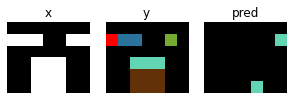

[[ 0  0  0  0  0  0  0]
 [ 2  4  4  0  0 10  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  3  3  3  0  0]
 [ 0  0  7  7  7  0  0]
 [ 0  0  7  7  7  0  0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0]]


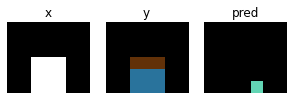

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 7 7 7 0 0]
 [0 0 4 4 4 0 0]
 [0 0 4 4 4 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0]]


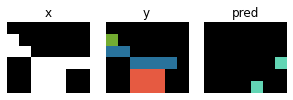

[[ 0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0]
 [ 4  4  0  0  0  0  0]
 [ 0  0  4  4  4  4  0]
 [ 0  0  8  8  8  0  0]
 [ 0  0  8  8  8  0  0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0]]


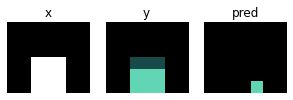

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 5 5 5 0 0]
 [0 0 3 3 3 0 0]
 [0 0 3 3 3 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0]]


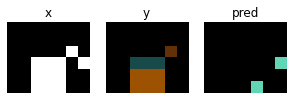

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 7 0]
 [0 0 5 5 5 0 0]
 [0 0 9 9 9 0 0]
 [0 0 9 9 9 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0]]


In [24]:
#show some predictions
pickset = random.choices(range(len(X_dat)),k=5)
d = [(X_dat[i],y_dat2[i]) for i in pickset]
for di in d:
    showModelPred(mm,di[0],di[1],True)

In [26]:
print(X_dat.shape)
print(y_dat2.shape)

(2500, 6, 7, 1)
(2500, 6, 7, 11)
